In [64]:
# Libraries
import os
import re
import json
import folium
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/ivesbrunner/Documents/Studium/01_Bachelor/04_Semester/04_ScientificProgramming/scientific_programming/Week_05/challenge


# Aufgabe 1

In [65]:
data = pd.read_csv('bicycles.csv', sep=",")
df = pd.DataFrame(data)

# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

data_types = df.dtypes
print("Data Types: ", data_types)

missing_values= df.isna().sum()
print("Number of Missing Values: ", missing_values)
df_clean_01 = df.dropna()

duplicated_values= df_clean_01.duplicated().sum()
print("Number of Duplicated Values: ", duplicated_values)
df_clean_01 = df_clean_01.dropna()

Number of Rows:  600
Number of Columns:  6
Data Types:  web-scraper-order        object
web-scraper-start-url    object
title_raw                object
address_raw              object
price_raw                object
description_raw          object
dtype: object
Number of Missing Values:  web-scraper-order        0
web-scraper-start-url    0
title_raw                0
address_raw              0
price_raw                0
description_raw          0
dtype: int64
Number of Duplicated Values:  0


# Aufgabe 2

In [66]:
df['price'] = df['price_raw'].apply(lambda x: re.sub('[^\d]', '', x))
df_sub = df[df['price'] != '']
df_sub['price'] = df_sub['price'].astype('int32')
print(df_sub['price'].dtypes)


int32


# Aufgabe 3

In [67]:
df_sub_price_range=df_sub[(df_sub['price'] >= 200) & (df_sub['price'] <= 2000)]

# Aufgabe 4



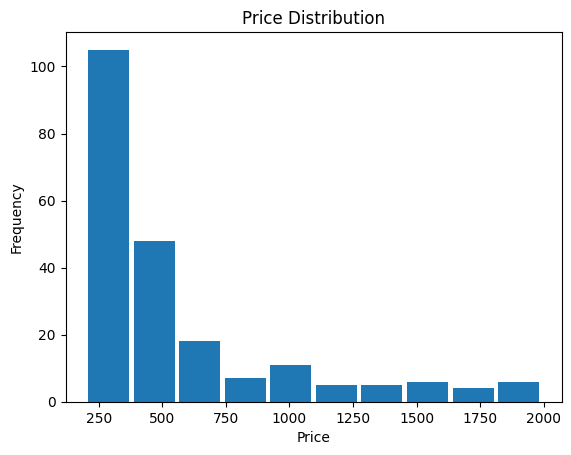

In [68]:
plt.hist(df_sub_price_range["price"], rwidth=0.9)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

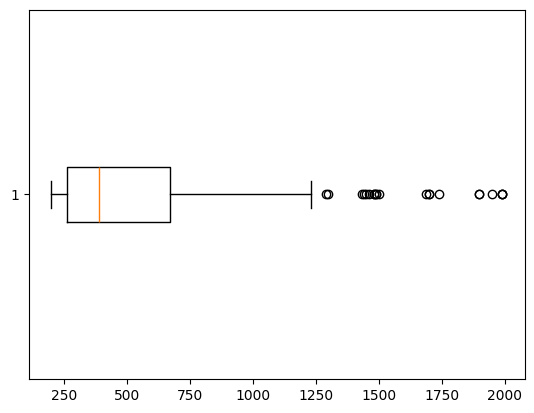

In [69]:
plt.boxplot(df_sub_price_range["price"], vert=False)
plt.show()

# Aufgabe 5

In [70]:
df_sub_price_range['canton'] = df['address_raw'].apply(lambda x: x.split(',')[0])
df_sub_price_range[['address_raw', 'canton']]

,address_raw,canton
1,"Zürich, 8032, 26.02.2023",Zürich
3,"St. Gallen, 9607, 26.02.2023",St. Gallen
6,"Glarus, 8866, 26.02.2023",Glarus
15,"Schwyz, 8806, 25.02.2023",Schwyz
16,"Glarus, 8865, 25.02.2023",Glarus
...,...,...
577,"Aargau, 5600, Heute 07:29",Aargau
578,"Basel-Landschaft, 4410, Heute 07:24",Basel-Landschaft
585,"Luzern, 6122, Heute 06:05",Luzern
593,"Bern, 3084, Gestern 19:06",Bern


# Aufgabe 6

In [71]:
bicycle_dict = {x: df_sub_price_range.loc[df_sub_price_range['canton'] == x, 'price'].tolist() \
               for x in set(df_sub_price_range['canton'])}

# Print the resulting dictionary keys and values
print('Dictionary with keys and values:')
print(bicycle_dict)

# Print the resulting dictionary keys
print('\nDictionary keys:')
print(bicycle_dict.keys())

# Print the resulting dictionary values
print('\nDictionary values')
print(bicycle_dict.values())

Dictionary with keys and values:
{'Graubünden': [590, 250, 400], 'Wallis': [200], 'Zürich': [200, 220, 800, 350, 550, 690, 339, 250, 200, 251, 949, 599, 336, 949, 899, 1690, 990, 250, 430, 379, 1290, 990, 240, 550, 990, 230, 270, 200, 950, 790, 1700, 300, 949, 300, 455, 270, 280, 290, 250, 1230, 1030, 375, 450, 800, 240, 220], 'Uri': [260], 'Tessin': [280], 'Appenzell Ausserrhoden': [250], '04.03.2023': [320], 'St. Gallen': [320, 400, 200, 1460, 210, 1120, 1990, 1120, 1490, 1500, 500, 200, 270, 520], 'Zug': [440, 440, 222, 245], 'Basel-Landschaft': [490, 320, 950, 870, 1190, 1440, 555, 450], 'Glarus': [390, 355], 'Aargau': [480, 580, 320, 210, 650, 300, 300, 600, 230, 320, 480, 200, 280, 390, 250, 250, 280, 700, 800, 230, 480, 699, 230, 250, 270, 280, 400, 1900, 1700, 250, 320, 500, 300, 499, 1100, 500, 250, 320, 320, 230, 280, 250, 260, 230, 250, 280, 230, 260, 230, 220, 950, 950, 280, 390, 230, 360, 320, 380, 599, 599, 320], 'Schwyz': [399, 250, 324], 'Bern': [449, 1299, 399, 329, 42

# Aufgabe 7

In [72]:
key = "Zürich"
if key in bicycle_dict:
    print(f'The key {key} exists!')

print(bicycle_dict.get(key))

The key Zürich exists!
[200, 220, 800, 350, 550, 690, 339, 250, 200, 251, 949, 599, 336, 949, 899, 1690, 990, 250, 430, 379, 1290, 990, 240, 550, 990, 230, 270, 200, 950, 790, 1700, 300, 949, 300, 455, 270, 280, 290, 250, 1230, 1030, 375, 450, 800, 240, 220]
